In [80]:
import os
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("C:\\Users\\Eswar Reddy\\Downloads\\Banking-Domain-master\\bank-data.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

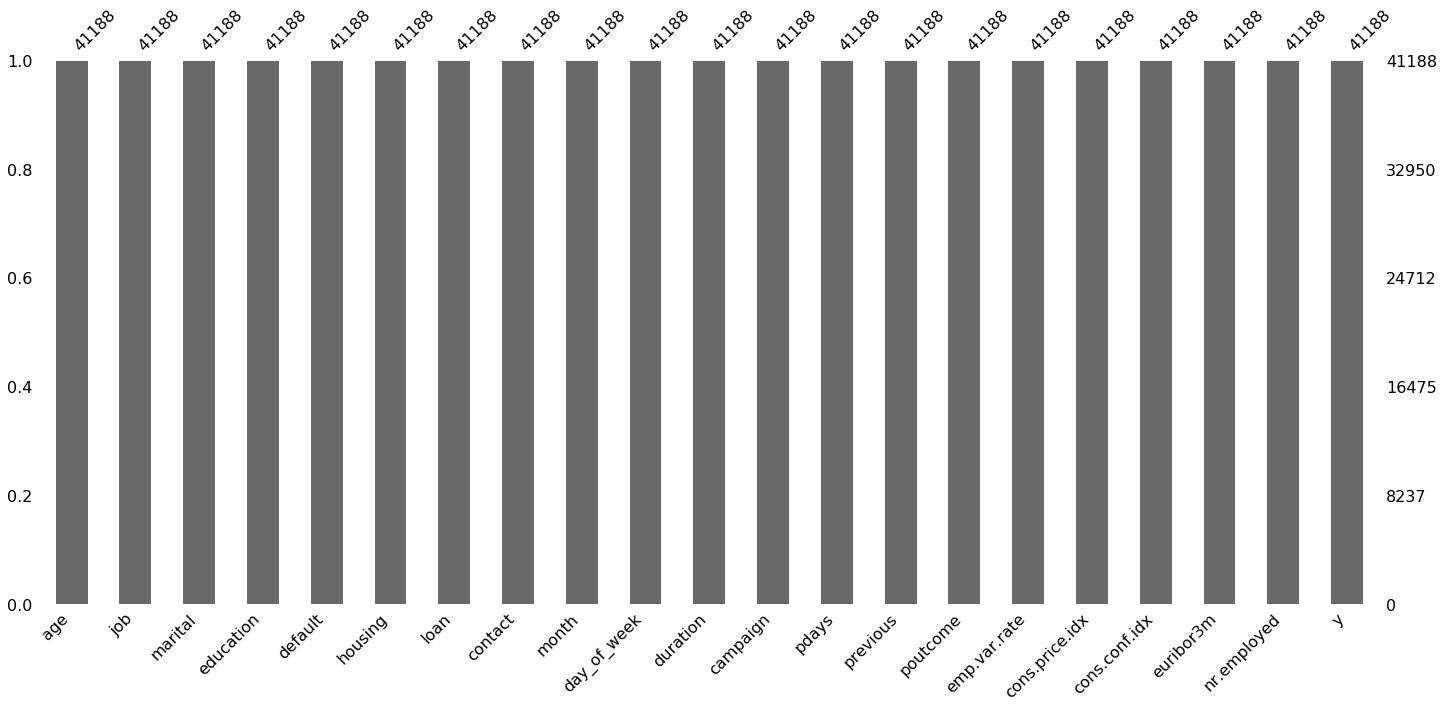

In [6]:
msno.bar(df)

In [7]:
X_df=df.drop('y',axis=1)
y=df['y']
X_df.shape,y.shape


((41188, 20), (41188,))

In [8]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
y=pd.Series(np.where(y.values=='yes',1,0),y.index)
y.value_counts()

0    36548
1     4640
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [11]:
numeric_df=X_df._get_numeric_data()
numeric_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [12]:
cat_df = X_df.select_dtypes(include='object')
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [13]:
X_df = numeric_df.join(pd.get_dummies(cat_df))
X_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
X_df.shape

(41188, 63)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y,test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 63), (8238, 63), (32950,), (8238,))

In [16]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)



C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

print("Model accuracy is", model_base.score(X_test, y_test))

Model accuracy is 0.9042243262927895


In [18]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.203657
         Iterations: 35


C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                                           Results: Logit
Model:                           Logit                       Pseudo R-squared:            0.421     
Dependent Variable:              y                           AIC:                         13527.0057
Date:                            2020-07-08 09:24            BIC:                         13972.3513
No. Observations:                32950                       Log-Likelihood:              -6710.5   
Df Model:                        52                          LL-Null:                     -11599.   
Df Residuals:                    32897                       LLR p-value:                 0.0000    
Converged:                       0.0000                      Scale:                       1.0000    
No. Iterations:                  35.0000                                                            
----------------------------------------------------------------------------------------------------
                               Co

In [19]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[7112,  198],
       [ 591,  337]], dtype=int64)

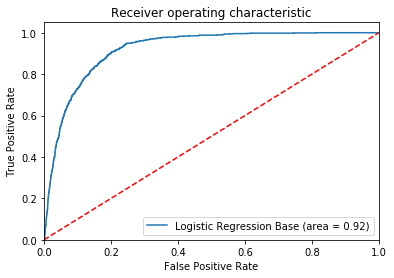

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# logit_roc_auc = roc_auc_score(y_test, model_base.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_base.predict_proba(X_test)[:,1])
# plt.figure()

probs = model_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
df.apply(lambda x: len(x.unique()),axis=0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [22]:
# Label Encode instead of dummy variables

mappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_df = df.drop('y', axis=1)
for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(np.array(label_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

In [23]:
X_train,X_test,y_train,y_test=train_test_split(label_df, y, test_size = 0.2, random_state = 10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32950, 20), (8238, 20), (32950,), (8238,))

C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy is 0.9060451565914057


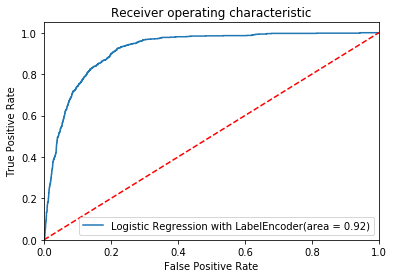

In [24]:
clf = LogisticRegression()
model_label = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print("Model accuracy is", model_label.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_label.predict_proba(X_test)
preds = probs[:,1]
labelfpr, labeltpr, labelthreshold = metrics.roc_curve(y_test, preds)
label_roc_auc = metrics.auc(labelfpr, labeltpr)

plt.figure()
plt.plot(labelfpr, labeltpr, label='Logistic Regression with LabelEncoder(area = %0.2f)' % label_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [25]:
mappings

[{'admin.': 1,
  'blue-collar': 2,
  'entrepreneur': 3,
  'housemaid': 4,
  'management': 5,
  'retired': 6,
  'self-employed': 7,
  'services': 8,
  'student': 9,
  'technician': 10,
  'unemployed': 11,
  'unknown': 12},
 {'divorced': 1, 'married': 2, 'single': 3, 'unknown': 4},
 {'basic.4y': 1,
  'basic.6y': 2,
  'basic.9y': 3,
  'high.school': 4,
  'illiterate': 5,
  'professional.course': 6,
  'university.degree': 7,
  'unknown': 8},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'cellular': 1, 'telephone': 2},
 {'apr': 1,
  'aug': 2,
  'dec': 3,
  'jul': 4,
  'jun': 5,
  'mar': 6,
  'may': 7,
  'nov': 8,
  'oct': 9,
  'sep': 10},
 {'fri': 1, 'mon': 2, 'thu': 3, 'tue': 4, 'wed': 5},
 {'failure': 1, 'nonexistent': 2, 'success': 3}]

In [26]:
educ_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

In [27]:
mappings2 = []

# using cat.codes for order, one hot for high cardinality and weak case of cardinality.

def ordered_labels(df, col, order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order, ordered=True)
    df[col] = df[col].cat.codes.astype(int)

label_df_2 = df.drop('y', axis=1)

# Use dummy variables for occupation
label_df_2 = pd.concat([label_df_2, pd.get_dummies(label_df_2['job'])],axis=1).drop('job',axis=1)

# Use ordered cat.codes for days, months, and education
ordered_labels(label_df_2, 'education', educ_order)
ordered_labels(label_df_2, 'month', month_order)
ordered_labels(label_df_2, 'day_of_week', day_order)

# Same label encoding for rest since low cardinality
for i, col in enumerate(label_df_2):
    if label_df_2[col].dtype == 'object':
        label_df_2[col] = label_encoder.fit_transform(np.array(label_df_2[col].astype(str)).reshape((-1,)))
        mappings2.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

label_df_2.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,56,1,2,0,0,0,1,2,0,261,...,0,1,0,0,0,0,0,0,0,0
1,57,1,5,1,0,0,1,2,0,149,...,0,0,0,0,0,1,0,0,0,0
2,37,1,5,0,2,0,1,2,0,226,...,0,0,0,0,0,1,0,0,0,0
3,40,1,3,0,0,0,1,2,0,151,...,0,0,0,0,0,0,0,0,0,0
4,56,1,5,0,0,2,1,2,0,307,...,0,0,0,0,0,1,0,0,0,0


C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy is 0.9053168244719592


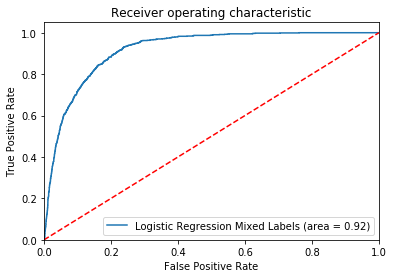

In [28]:
X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

clf = LogisticRegression()
model_mix = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print("Model accuracy is", model_mix.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

classes = model_mix.predict(X_test)
probs = model_mix.predict_proba(X_test)
preds = probs[:,1]
mixfpr, mixtpr, mixthreshold = metrics.roc_curve(y_test, preds)
mix_roc_auc = metrics.auc(mixfpr, mixtpr)

plt.figure()
plt.plot(mixfpr, mixtpr, label='Logistic Regression Mixed Labels (area = %0.2f)' % mix_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
print(metrics.classification_report(classes,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7692
           1       0.37      0.64      0.47       546

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.67      0.78      0.71      8238
weighted avg       0.93      0.91      0.92      8238



In [31]:
# Feature importance rankings.

weights = zip(label_df_2.columns, model_mix.coef_[0])
ranked_weights = sorted(weights, key=lambda x: x[1], reverse = True)

In [32]:
# Top 10 positive feature importance

ranked_weights[:10]

[('cons.price.idx', 0.3259318109571396),
 ('poutcome', 0.06609716101429798),
 ('marital', 0.05870181626986102),
 ('education', 0.04514365339302553),
 ('cons.conf.idx', 0.041966668061878425),
 ('retired', 0.031532457438420224),
 ('admin.', 0.030825750753387168),
 ('month', 0.025736421604389773),
 ('student', 0.025336857391799493),
 ('technician', 0.010811832486078456)]

In [33]:
# Top 10 negative feature importance

ranked_weights[-10:]

[('management', -0.006911170021829599),
 ('loan', -0.013814807654338826),
 ('services', -0.023882751753732574),
 ('campaign', -0.03220649205035454),
 ('previous', -0.03729249979222531),
 ('default', -0.0643362848556274),
 ('blue-collar', -0.06521465821883048),
 ('contact', -0.08240547859091892),
 ('emp.var.rate', -0.21648974180726152),
 ('euribor3m', -0.24926399972124247)]

In [34]:
abs_weights = zip(label_df_2.columns, model_mix.coef_[0]) 
abs_ranked_weights = sorted(abs_weights, key=lambda x: abs(x[1]), reverse = True)
abs_ranked_weights[:10]

[('cons.price.idx', 0.3259318109571396),
 ('euribor3m', -0.24926399972124247),
 ('emp.var.rate', -0.21648974180726152),
 ('contact', -0.08240547859091892),
 ('poutcome', 0.06609716101429798),
 ('blue-collar', -0.06521465821883048),
 ('default', -0.0643362848556274),
 ('marital', 0.05870181626986102),
 ('education', 0.04514365339302553),
 ('cons.conf.idx', 0.041966668061878425)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

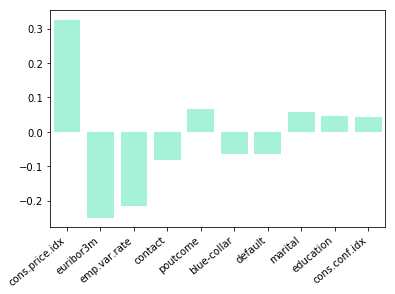

In [36]:
# Absolute value feature importance plot
import seaborn as sb
labels, weights = zip(*abs_ranked_weights[:10])
sb.barplot(x = pd.Series(labels), y = pd.Series(weights), color='aquamarine', alpha=0.8)
plt.xticks(rotation=40, ha='right')

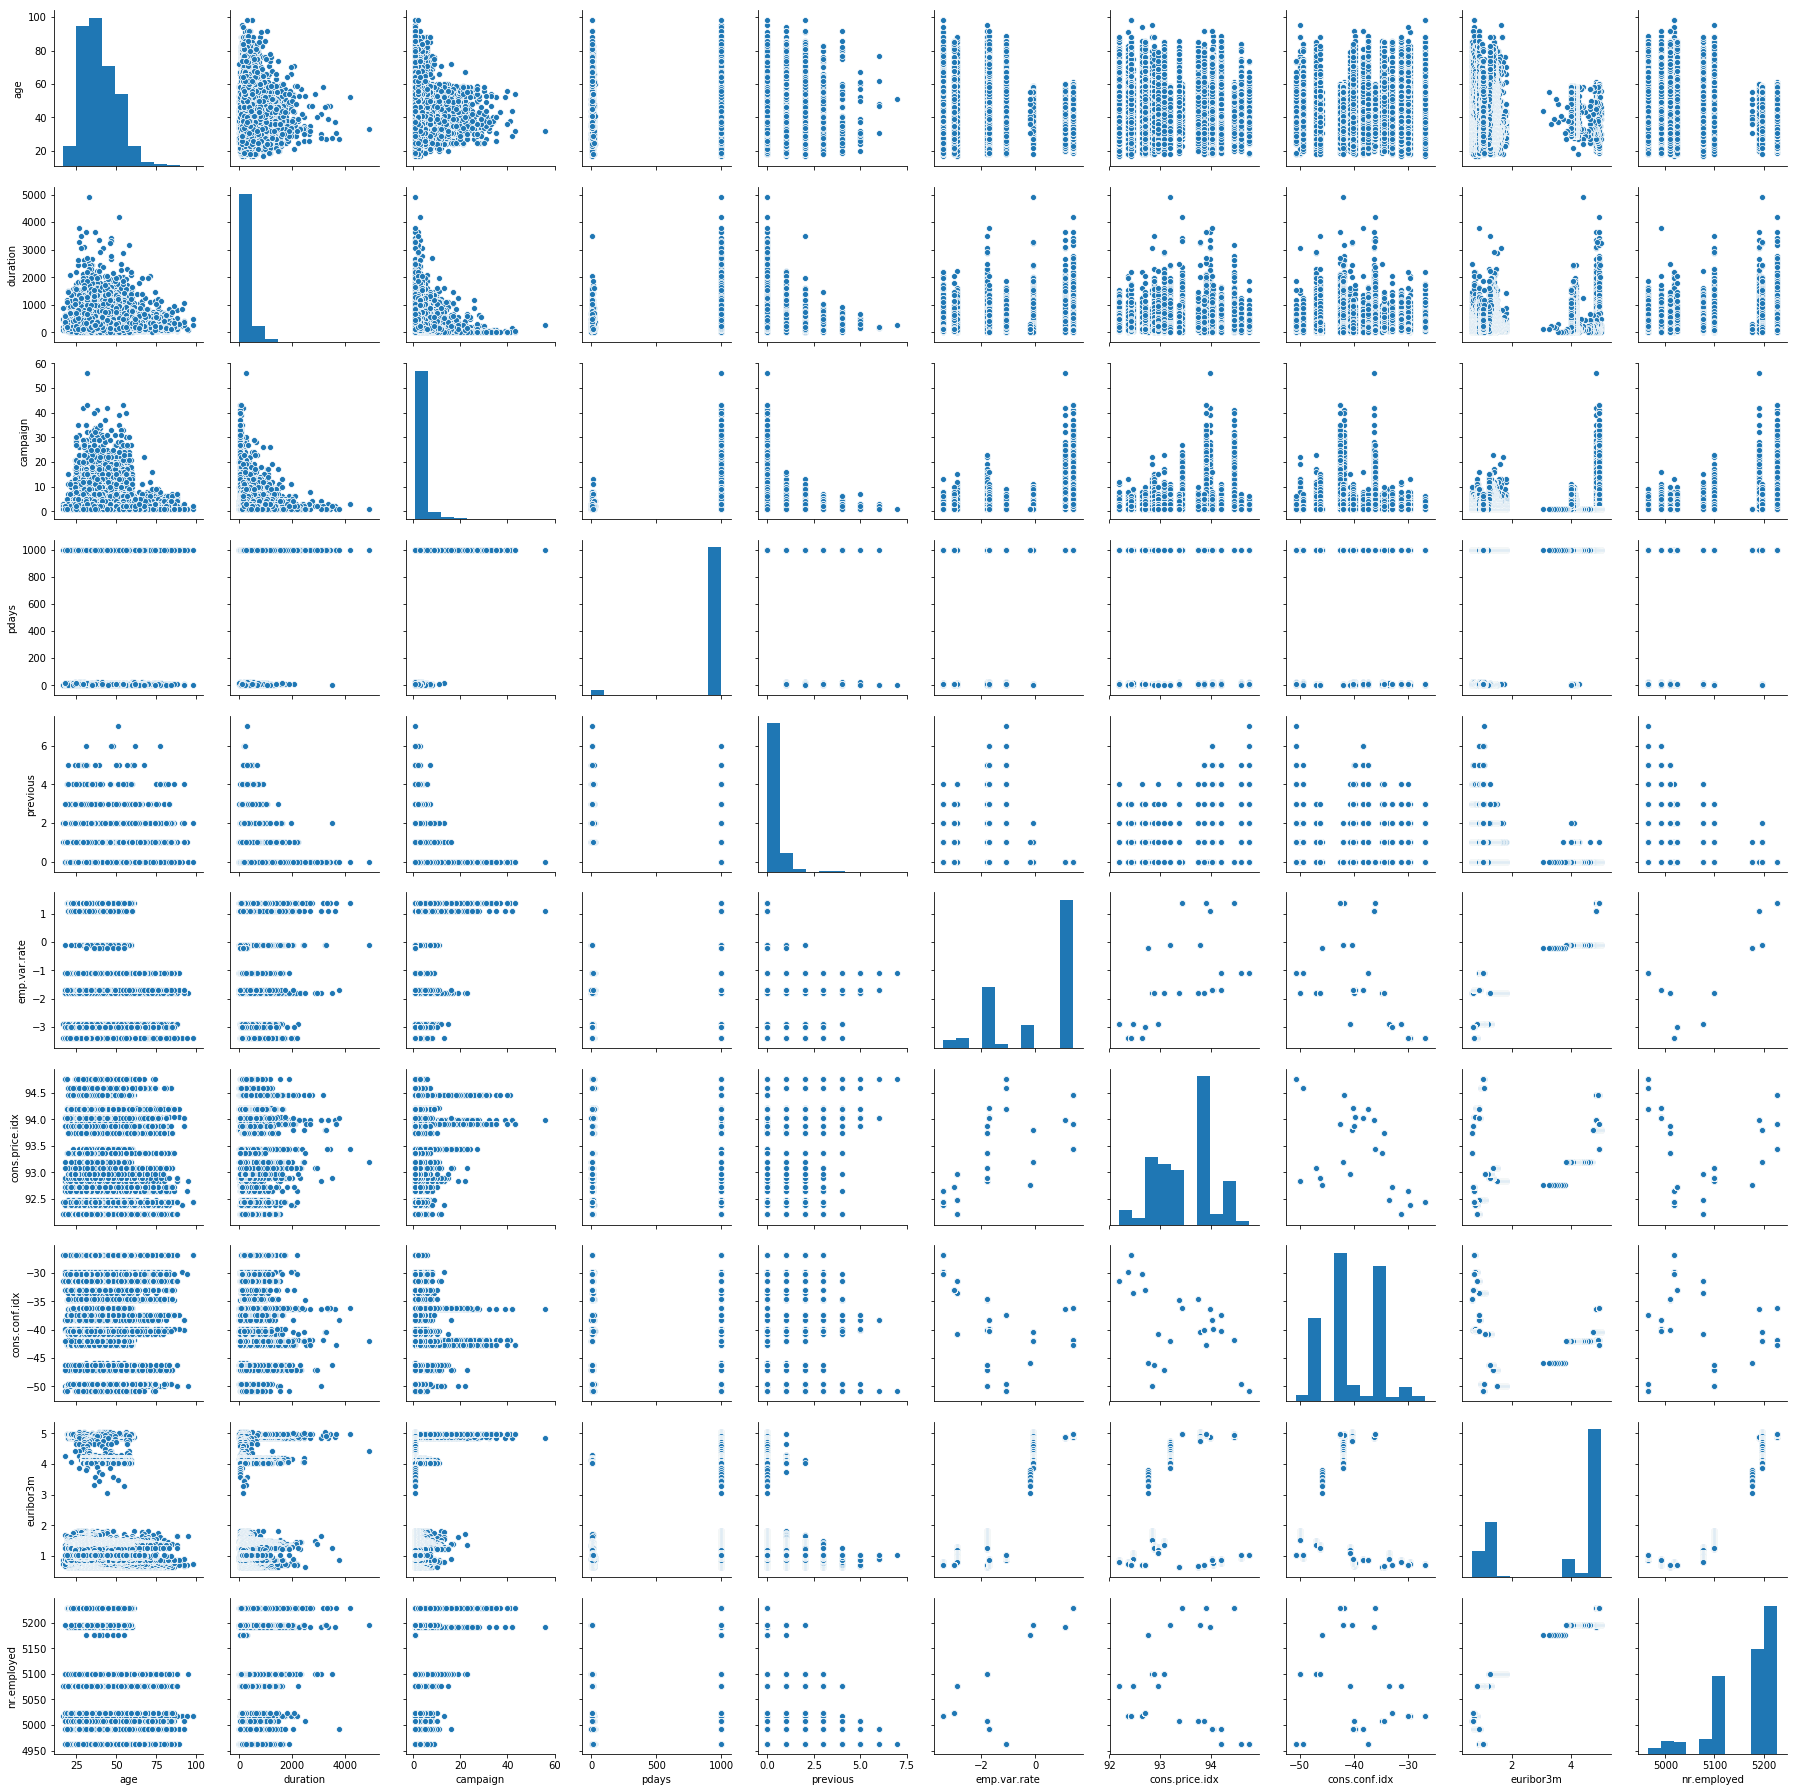

In [38]:
# Pairplot to look at distributions.
#sb.pairplot(numeric_df)

# Feature Engineering

In [39]:
X_df_2=label_df_2.copy()

In [44]:
X_df_2.columns

Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown'],
      dtype='object')

In [45]:
X_df_2.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [46]:
# Creating binary variable for whether there was previous contact.

X_df_2[(X_df_2['previous'] == 0) & (X_df_2['pdays'] != 999)]

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown


In [47]:
X_df_2['previous_contact']=np.where(X_df_2['pdays']==999,0,1)

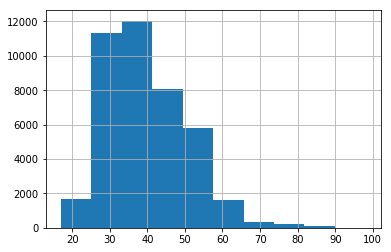

In [54]:
%matplotlib inline
X_df_2['age'].hist()

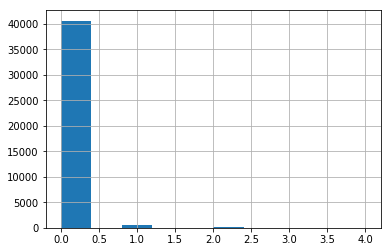

In [58]:
X_df_2['campaign'].hist()

In [56]:
def bins5(df, col):
    df[col] = pd.cut(df[col], 5, labels=range(5)).astype(int)

In [57]:
bins5(X_df_2, 'age')
bins5(X_df_2, 'campaign')
bins5(X_df_2, 'previous')
bins5(X_df_2, 'nr.employed')

In [59]:
# SMOTE for rebalancing
y.value_counts()[1]/y.value_counts().sum()

0.11265417111780131

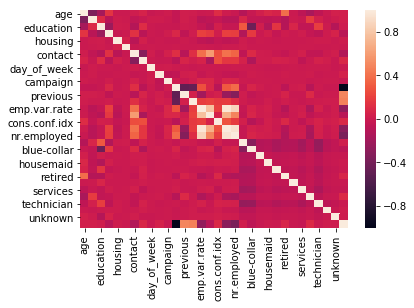

In [60]:
sb.heatmap(X_df_2.corr())

In [61]:
# Highly correlated features

corr_mat = X_df_2.corr()
half_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
half_corr_mat.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,previous_contact
age,NaN,-0.367115,-0.172745,0.155196,-0.000699,-0.005032,0.015743,0.061888,-0.017328,-0.000216,...,0.081086,0.061350,0.390116,-0.000509,-0.065628,-0.160948,-0.057496,-0.004555,0.041177,0.034332
marital,NaN,NaN,0.101376,-0.079450,0.010467,0.005788,-0.054501,-0.018653,0.014472,0.010290,...,-0.055181,-0.051110,-0.108069,0.002293,-0.009286,0.184116,0.040090,-0.009826,0.009834,0.037973
education,NaN,NaN,NaN,-0.218989,0.020847,0.011312,-0.108651,0.115857,-0.004091,-0.015618,...,-0.119471,0.154868,-0.106842,0.074657,-0.051706,-0.053444,0.189820,0.003098,-0.109193,0.021739
default,NaN,NaN,NaN,NaN,-0.015815,-0.003782,0.135238,-0.084322,-0.004286,-0.011794,...,0.036796,-0.035507,0.010070,-0.004843,0.017599,-0.032609,-0.069124,0.010481,0.055630,-0.080066
housing,NaN,NaN,NaN,NaN,NaN,0.044296,-0.082186,0.031865,-0.009003,-0.007658,...,-0.004205,-0.007936,-0.001892,-0.000393,-0.004397,0.004656,0.010149,0.008631,-0.001290,0.010518


In [62]:
[col for col in half_corr_mat if any(half_corr_mat[col] > 0.9)]

['euribor3m', 'nr.employed']

In [63]:
# X_df_2 = X_df_2.drop('euribor3m', axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 32), (8238, 32), (32950,), (8238,))

In [65]:
X_train.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,previous_contact
5285,2,1,3,1,2,2,1,2,4,168,...,0,0,0,0,0,0,1,0,0,0
1196,2,1,4,0,2,0,1,2,3,135,...,0,0,0,0,0,0,0,0,0,0
33666,0,2,6,0,2,0,0,2,2,774,...,0,0,0,1,0,0,0,0,0,0
29515,1,1,7,0,2,0,0,1,0,17,...,0,0,0,0,1,0,0,0,0,0
15848,0,2,6,0,2,0,0,4,0,292,...,0,0,0,0,0,0,1,0,0,0


In [68]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy is 0.906409322651129


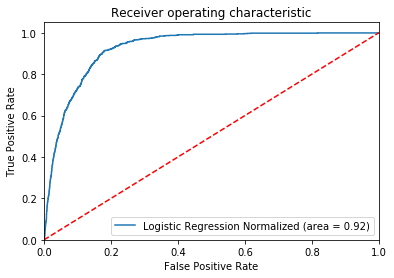

In [71]:
clf = LogisticRegression()
model_norm = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print('Model accuracy is',model_norm.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_norm.predict_proba(X_test)
preds = probs[:,1]
normfpr, normtpr, normthreshold = metrics.roc_curve(y_test, preds)
norm_roc_auc = metrics.auc(normfpr, normtpr)

plt.figure()
plt.plot(normfpr, normtpr, label='Logistic Regression Normalized (area = %0.2f)' % norm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf = RandomForestClassifier(n_jobs=-1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model_rf = clf.fit(X_train, y_train)
print('Model accuracy is',model_rf.score(X_test, y_test))

C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in 

Model accuracy is 0.9059237679048313


C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnin

C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Eswar Reddy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnin

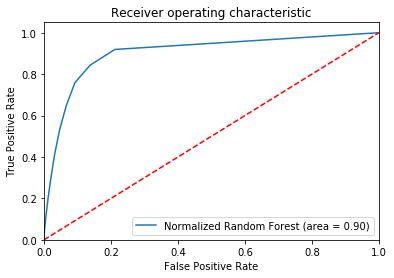

In [89]:
probs = model_rf.predict_proba(X_test)
preds = probs[:,1]
rffpr, rftpr, rfthreshold = metrics.roc_curve(y_test, preds)
rf_roc_auc = metrics.auc(rffpr, rftpr)

plt.figure()
plt.plot(rffpr, rftpr, label='Normalized Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()